# Logistic Regression

The hypothesis of linear regression is called as **Raw Model Output** .

$$ h_{\theta}(x)=\theta_{0} x_{0}+\theta_{1} x_{1}+\ldots+\theta_{j} x_{j} \quad=\theta^{T} x=\left[\begin{array}{llll}{\theta_{0}} & {\theta_{1}} & {\dots} & {\theta_{j}}\end{array}\right]\left[\begin{array}{c}{x_{0}} \\ {x_{1}} \\ {\dots} \\ {x_{j}}\end{array}\right] = {\theta^{T} x} $$  
where $ x_{0}=1 $  

For logistic regression predictions, we tend to use the probability for the binary prediction. However, like the definite class predictions, they come from the raw model output(sign of raw model output).

In [56]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
      """Plot the decision boundaries for a classifier.
  
      Parameters
      ----------
      ax: matplotlib axes object
      clf: a classifier
      xx: meshgrid ndarray
      yy: meshgrid ndarray
      params: dictionary of params to pass to contourf, optional
      """
      if proba:
          Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
          Z = Z.reshape(xx.shape)
          out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
          ax.contour(xx, yy, Z, levels=[0.5])
      else:
          Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
          Z = Z.reshape(xx.shape)
          out = ax.contourf(xx, yy, Z, **params)
      return out
def make_meshgrid(x, y, h=.02, lims=None):
      """Create a mesh of points to plot in
      Parameters
      ----------
      x: data to base x-axis meshgrid on
      y: data to base y-axis meshgrid on
      h: stepsize for meshgrid, optional
  
      Returns
      -------
      xx, yy : ndarray
      """
  
      if lims is None:
          x_min, x_max = x.min() - 1, x.max() + 1
          y_min, y_max = y.min() - 1, y.max() + 1
      else:
          x_min, x_max, y_min, y_max = lims
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
      return xx, yy
    
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
      X0, X1 = X[:, 0], X[:, 1]
      xx, yy = make_meshgrid(X0, X1, lims=lims)
  
      if ax is None:
          plt.figure()
          ax = plt.gca()
          show = True
      else:
          show = False
  
      # can abstract some of this into a higher-level function for learners to call
      cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
      if proba:
          cbar = plt.colorbar(cs)
          cbar.ax.set_ylabel('probability of red $\\Delta$ class', fontsize=20, rotation=270, labelpad=30)
          cbar.ax.tick_params(labelsize=14)
      #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
      labels = np.unique(y)
      if len(labels) == 2:
          ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
          ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
      else:
          ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)
  
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
  #     ax.set_xlabel(data.feature_names[0])
  #     ax.set_ylabel(data.feature_names[1])
      if ticks:
          ax.set_xticks(())
          ax.set_yticks(())
  #     ax.set_title(title)
      if show:
          plt.show()
      else:
          return ax

/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


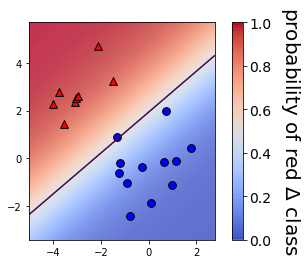

In [57]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

For logistic regression probability, it has a transformation based on the raw model output by "squashing" raw model output between 0 and 1. Normally, we use sigmoid function.  
$$ h_{\theta}(x)=\frac{1}{1+e^{\left(-\theta^{T} x\right)}} $$

What hypothesis function returns is the probability that y = 1, given x, parameterized by θ, written as: h(x) = P(y = 1|x; θ). Decision boundary can be described as: Predict 1, if θᵀx ≥ 0 → h(x) ≥ 0.5; Predict 0, if θᵀx < 0 → h(x) < 0.5.

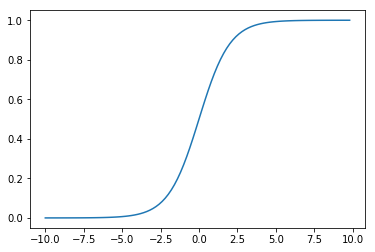

In [48]:
import math

#Xaxis is an one-dimensional array with 100 elements
#begin from -10.0 to 10.0, with interval of 0.2 for each two elements
x = np.arange(-10., 10., 0.2)

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a


plt.plot(x, sigmoid(x))
plt.show()

# Cost Function

**Logistic Loss** : Actually, logistic regression is just one of linear classifier. The essence of logistic regression is the logistic loss which give the logic. If y = 1, looking at the plot below on left, when prediction = 1, the cost = 0, when prediction = 0, the learning algorithm is punished by a very large cost. Similarly, if y = 0, the plot on right shows, predicting 0 has no punishment but predicting 1 has a large value of cost.  
$$ \operatorname{cost}\left(h_{\theta}(x), y\right)=\left\{\begin{array}{ll}{-\log \left(h_{\theta}(x)\right)} & {\text { if } y=1} \\ {-\log \left(1-h_{\theta}(x)\right)} & {\text { if } y=0}\end{array}\right. $$

It can be combined into one single formula.
$$ \operatorname{cost}\left(h_{\theta}(x), y\right)=-y \log \left(h_{\theta}(x)\right)-(1-y) \log \left(1 - h_{\theta}(x)\right) $$

The cost function of the model is:  
$$ J(\theta)=\frac{1}{m} \sum_{i=1}^{m} \operatorname{cost}\left(h_{\theta}\left(x^{(i)}\right), y^{(i)}\right) $$  
m = number of sample

If we make the true value bewtween -1 and 1. The formula can be written as $$ \operatorname{cost}\left(z, y\right)=\log \left(1+e^{\left(-zy\right)}\right) $$ where z = $ {\theta^{T} x} $

The code below shows the loss functions for logistic regression. For comparison, I also plot the hinge loss used by SVM.  
See more about [SVM](https://xinzhel.github.io/svm/).

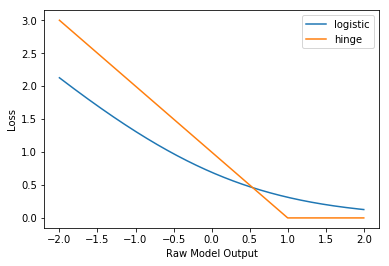

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Mathematical functions for logistic and hinge losses when y=1
def log_loss(raw_model_output):
    # another way: return np.log(1+np.exp(-raw_model_output))
    h = 1 / (1+np.exp(-raw_model_output))
    return -np.log(h)
def hinge_loss(raw_model_output):
     return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.xlabel("Raw Model Output")
plt.ylabel("Loss")
plt.show()

/home/sergio212/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/sergio212/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


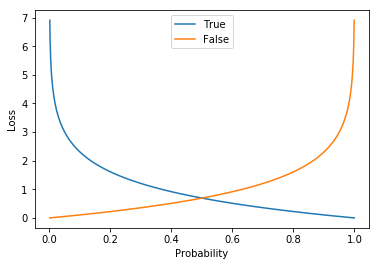

In [2]:
def log_loss(y, h):
    return -y * np.log(h) - (1-y) * np.log(1-h)
# Create a grid of values and plot
grid = np.linspace(0,1,1000)
plt.plot(grid, log_loss(1,grid), label='True')
plt.plot(grid, log_loss(0,grid), label='False')
plt.legend()
plt.xlabel("Probability")
plt.ylabel("Loss")
plt.show()

The code below minimizes the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization).

In [43]:
import sklearn.datasets
from sklearn.linear_model import LogisticRegression

In [44]:
from scipy.optimize import minimize
# wine = sklearn.datasets.load_wine()
# X, y = wine.data, wine.target

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        #h = 1 / (1+np.exp(-raw_model_output))
        #s = s - np.log(h) * y[i] - (1 - y[i]) * np.log(1 - h)
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

# print(lr.score(X, y))

# print(lr.predict_proba(wine.data[:1]))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[[ -8.74377226   8.39434344  45.33283925  -7.08200855   0.222536
   -3.55941739  33.15004405 -12.32180922 -23.11577807  -4.94517438
  -38.79144667  -6.41059935   0.18935714]]


/home/sergio212/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/home/sergio212/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/sergio212/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Regularization

Regularzied loss = original loss + large coefficient penalty  
Regularization would make coefficient smaller and is like a compromise between no use of the feature(setting the coefficient to zero) and full use of the feature(not regularized).
The regularized model can get less training accuracy but more test accuracy.

L1 and L2 regularization:  
In linear regression, Lasso and Ridge are said for L1 and L2 regularization. But for other models like logistic regression, we just say L1, L2, etc.

In [64]:
from sklearn.model_selection import GridSearchCV
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 10}
Total number of features: 2
Number of selected features: 2


/home/sergio212/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWa

In `LogisticRegression()` function in sklearn, smaller value of `C` means more regularization, which in turn means smaller coeffiecients, which means raw model outputs closer to zero and, thus, probability closer to 0.5 after the raw model output is squashed through the sigmoid function.

/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


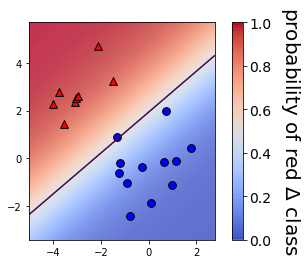

In [61]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

/home/sergio212/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


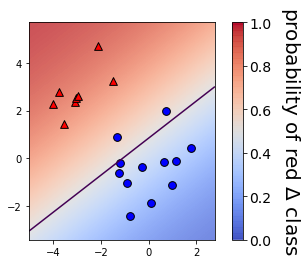

In [63]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

Smaller coefficients mean less confident predictions. Because regularization is supposed to combat overfitting which relates to overconfidence.

**Question**: With 2 features, we have 2 coefficients even though we only need one number to represent the slope of a line.  
**Answer**: The slope of line is the ratio of the coefficients and the magnitude of the coefficients gives us our confidence level.  
From these figures, regularization not only effects the confidence, but also the orientation of the boundary.

### Example
Let's visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

In [ ]:
def show_digit(i, lr=None):,
      plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
      plt.xticks(())
      plt.yticks(())
      if lr is None:
          plt.title("class label = %d" % y[i])
      else:
          pred = lr.predict(X[i][None])
          pred_prob = lr.predict_proba(X[i][None])[0,pred]
          plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

In [ ]:
# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
(proba_inds[0], lr)

# Multi-class Logistic Regression
## One-vs-rest
As we talked about above, it just fits a binary classifier for each class. Each classifier predict with all data and take largest output.

## Multinomial Logistic Regression
Another way to achieve multi-class classification with logistic regressionis to modify the loss function so that it directly tries to optimize accuracy on the multi-class problem. It is also called cross-entropy loss or softmax. It fits a single classifier for all classes.

In [71]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

wine = sklearn.datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

NameError: name 'LogisticRegression' is not defined

# Summary for Use in scikit-learn
* Logistic Regression in sklearn:
    + linear_model.LogisticRegression

